Importing necessary libraries and exploring data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("/content/Walmart_Store_sales.csv")

Preprocessing

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y' )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

EDA

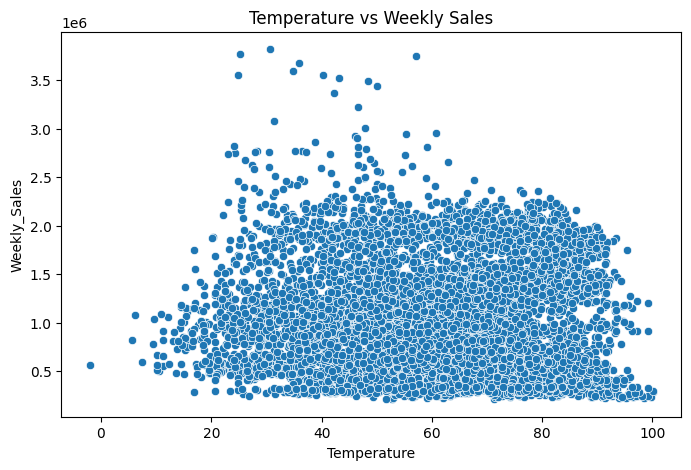

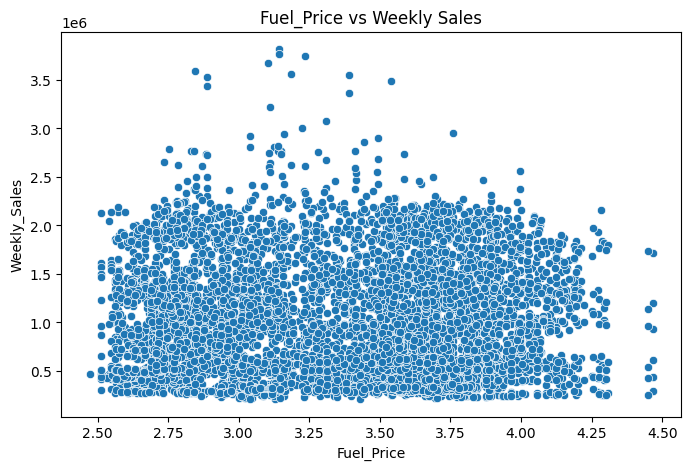

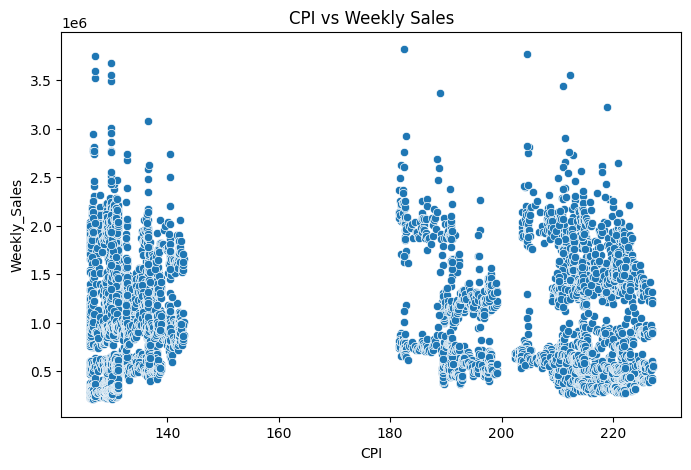

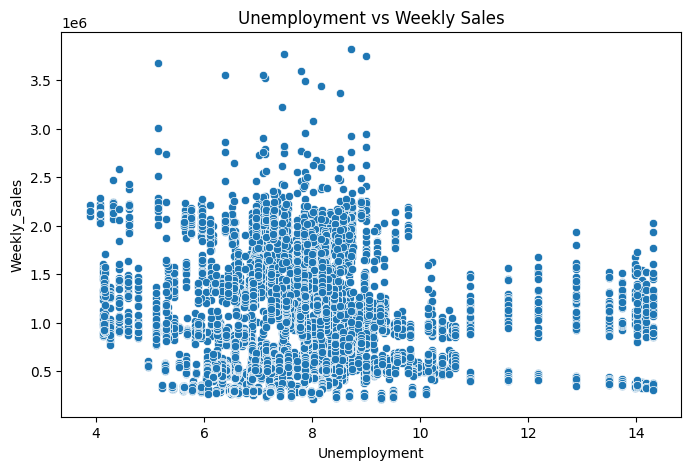

In [ ]:
# Scatter plots
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['Weekly_Sales'])
    plt.title(f'{feature} vs Weekly Sales')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

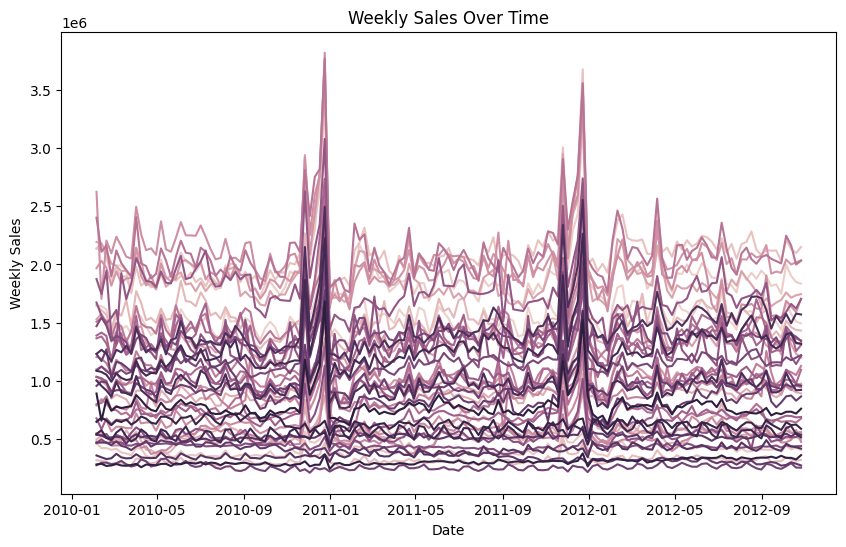

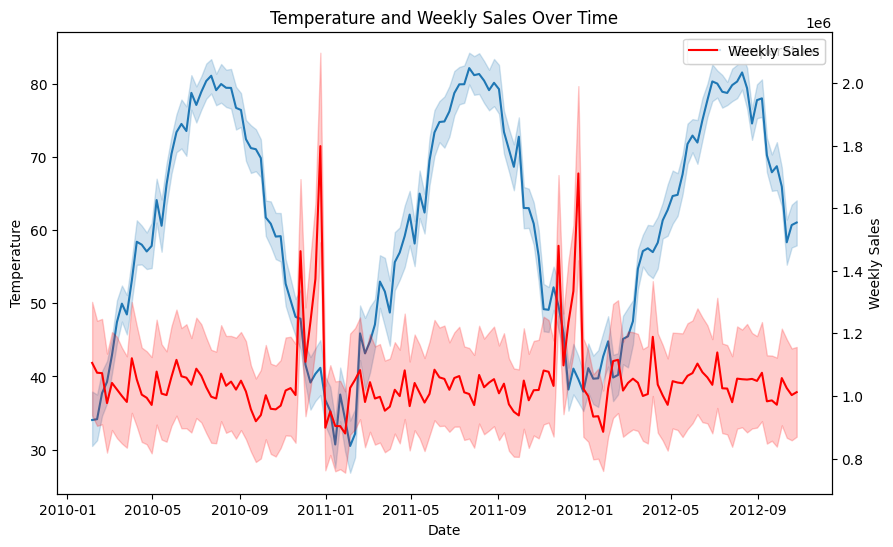

In [ ]:
# Plot weekly sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Weekly_Sales'], hue=df['Store'], legend=None)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Plot temperature and weekly sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Temperature'], label='Temperature')
plt.ylabel('Temperature')

# Second y-axis for weekly sales
ax2 = plt.twinx()
sns.lineplot(x=df.index, y=df['Weekly_Sales'], color='r', label='Weekly Sales', ax=ax2)
plt.ylabel('Weekly Sales')
plt.title('Temperature and Weekly Sales Over Time')
plt.show()


In [ ]:
print(df.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


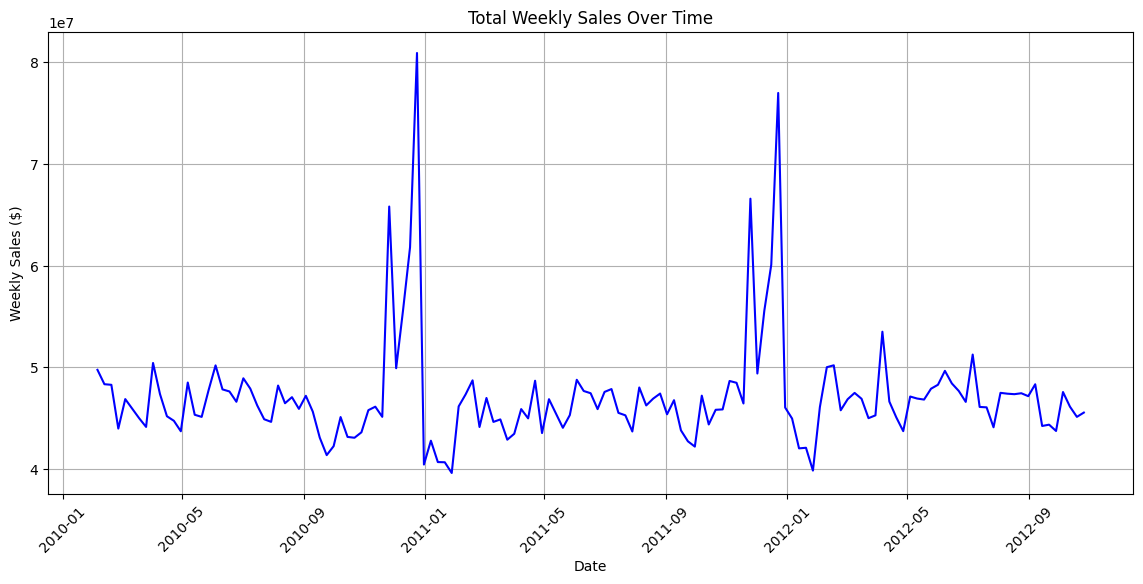

In [ ]:
import matplotlib.pyplot as plt

# Group by date and sum weekly sales
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(sales_over_time, color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


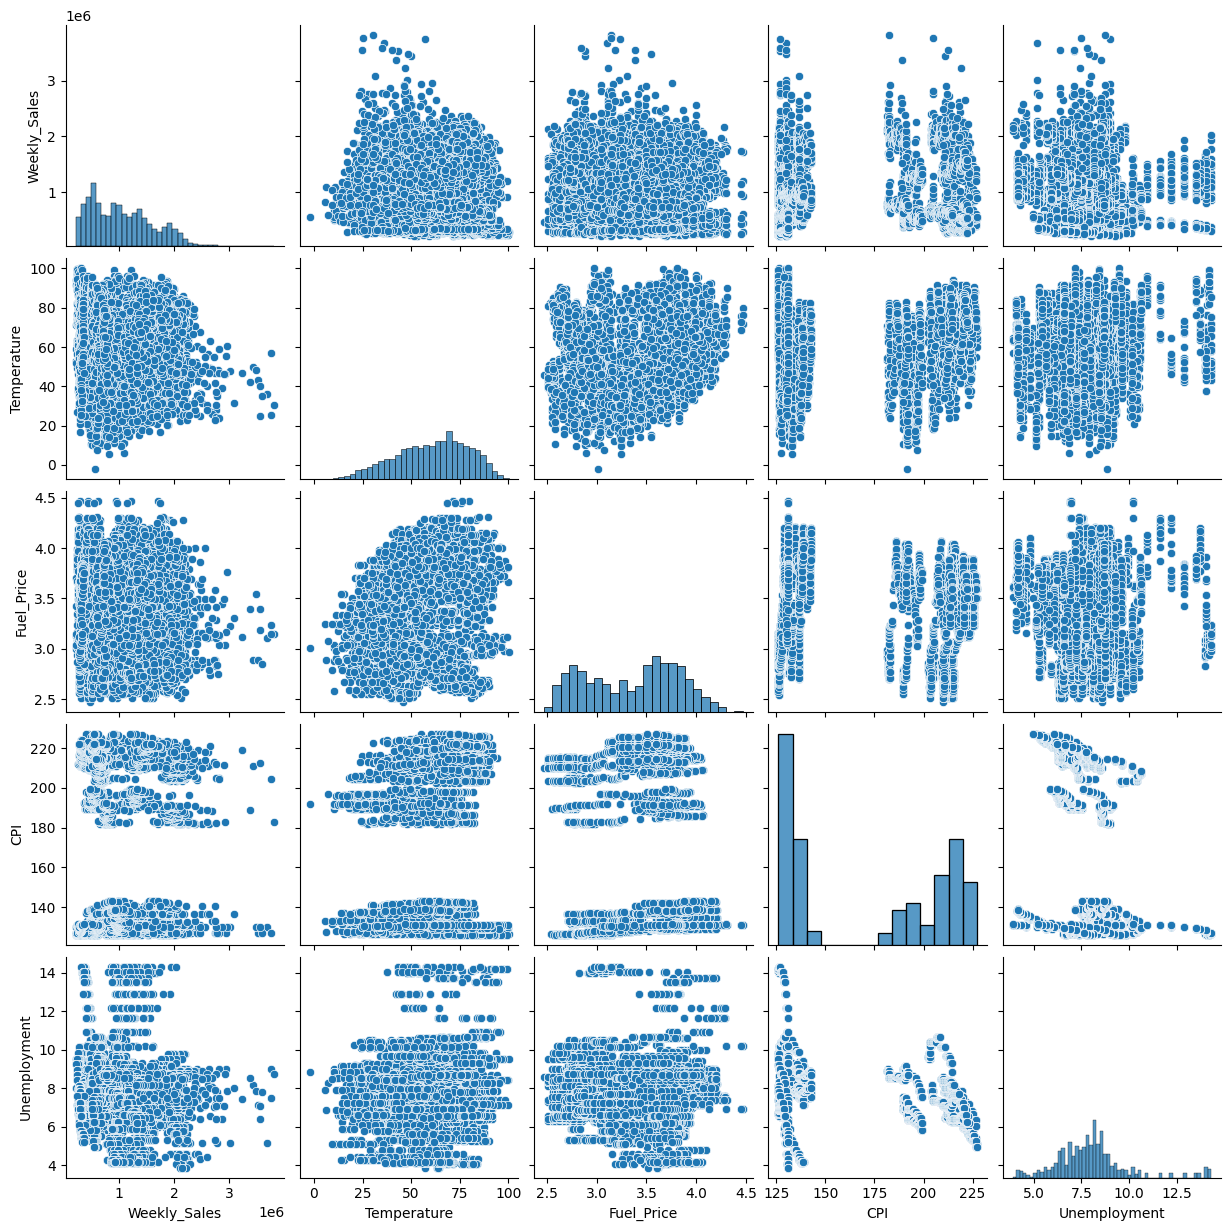

In [ ]:
# Pairplot for Weekly_Sales and numerical features
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


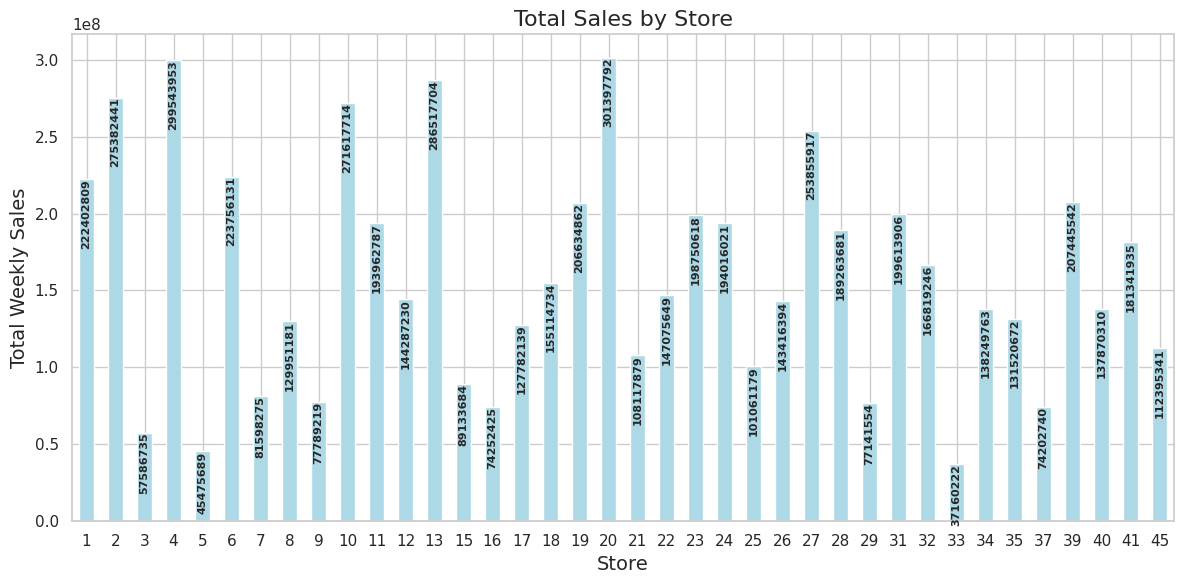

In [ ]:
# Group by store and calculate total weekly sales
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = total_sales_by_store.plot(kind='bar', color='lightblue')

# Add values on top of each bar
for bar in bars.patches:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_value,
             f'{y_value:.0f}',  # Format to integer
             ha='center',
             va='top',  # Position above the bar
             fontsize=8,rotation=90,weight='bold')

# Set titles and labels
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-ticks if necessary
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

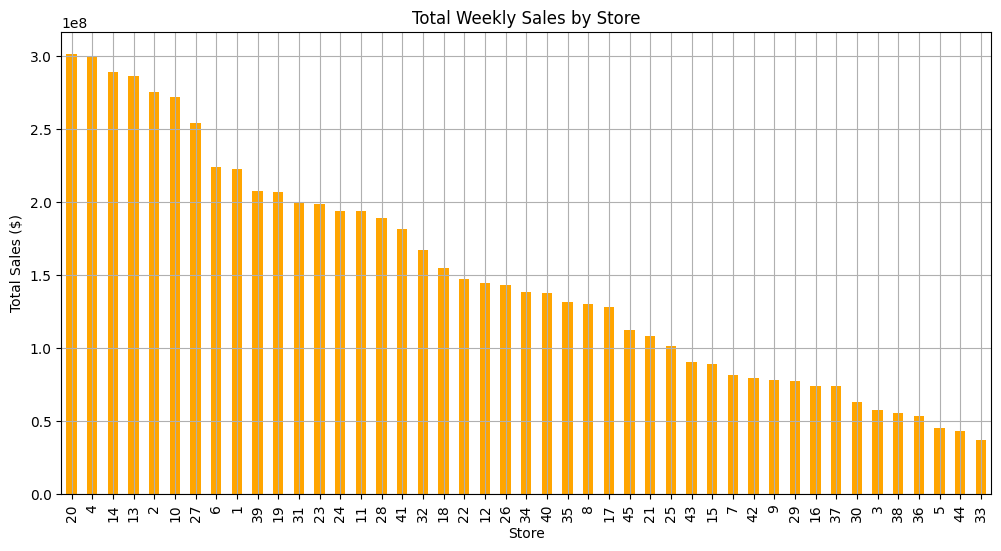

In [ ]:
# Group by store and sum weekly sales
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar', color='orange')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.show()


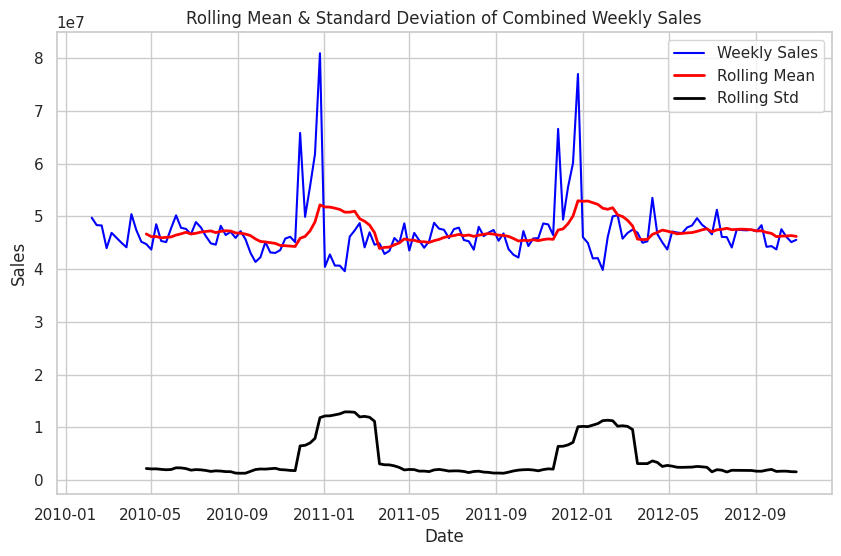

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'weekly_sales_data' is your DataFrame and it contains a 'Weekly_Sales' column
# First, ensure that the 'Date' column is in datetime format and set it as the index

# Combine all stores' sales into a single time series by resampling the data to get weekly totals
combined_weekly_sales = weekly_sales_data.resample('W')['Weekly_Sales'].sum()

# Calculate rolling mean and standard deviation
rolling_mean = combined_weekly_sales.rolling(window=12).mean()
rolling_std = combined_weekly_sales.rolling(window=12).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_weekly_sales, label='Weekly Sales', color='blue')
plt.plot(rolling_mean, color='red', label='Rolling Mean', linewidth=2)
plt.plot(rolling_std, color='black', label='Rolling Std', linewidth=2)
plt.title('Rolling Mean & Standard Deviation of Combined Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


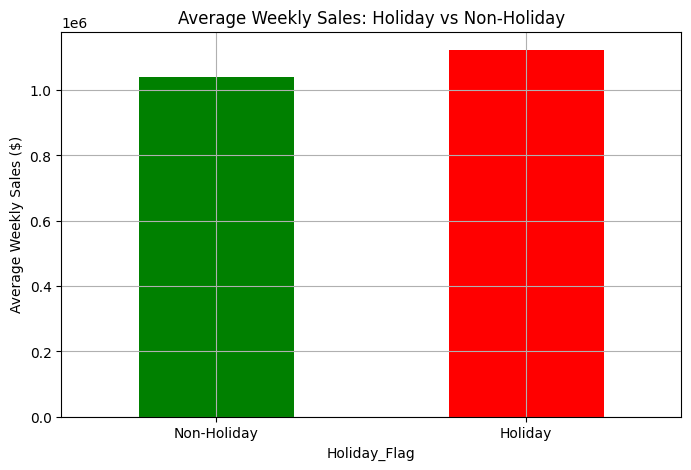

In [ ]:
# Group by Holiday_Flag and sum weekly sales
sales_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sales_holiday.plot(kind='bar', color=['green', 'red'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel('Average Weekly Sales ($)')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

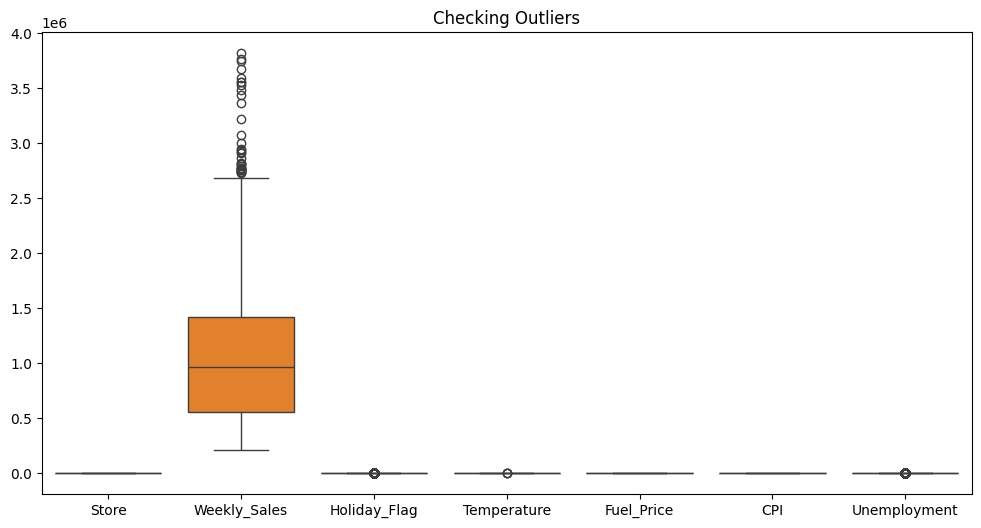

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.boxplot(data = df)
plt.title("Checking Outliers")
plt.show()

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df['Weekly_Sales'] = df['Weekly_Sales'].clip(lower=lower_bound, upper=upper_bound)

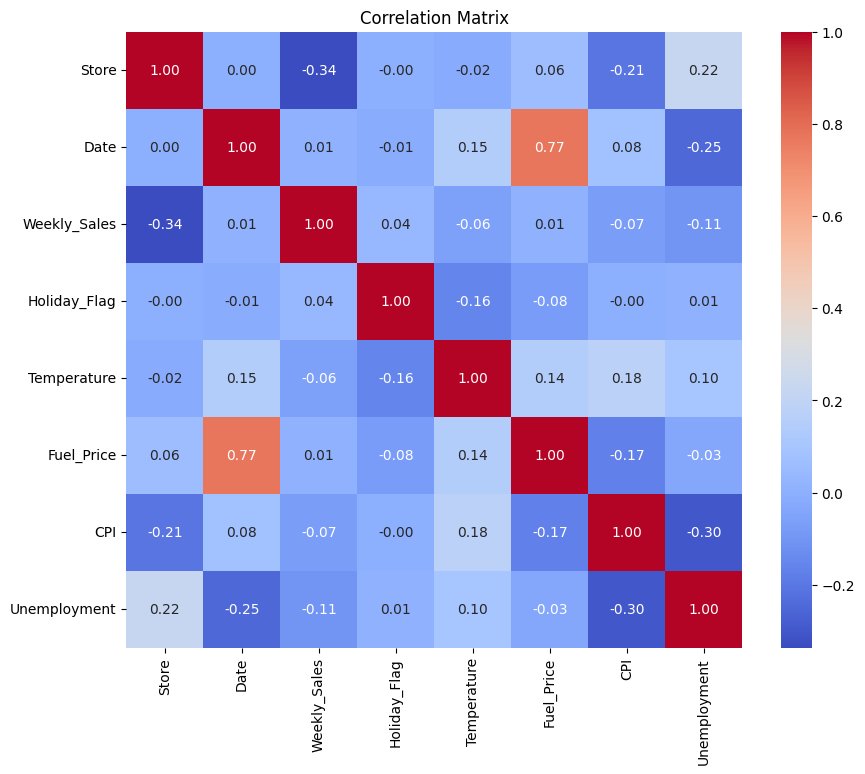

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(weekly_sales_data['Weekly_Sales'])

ADF Statistic: -4.624149498578306
p-value: 0.00011655869699901148


<Figure size 1200x600 with 0 Axes>

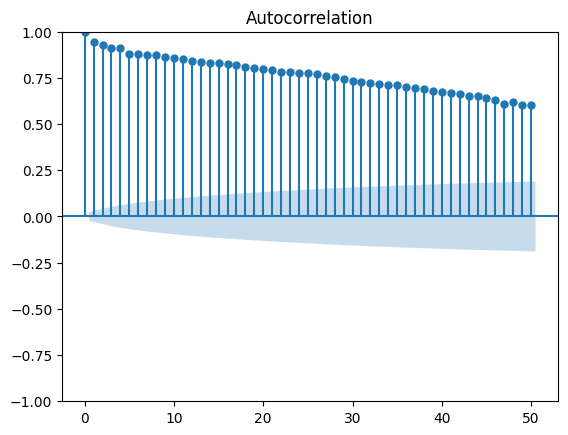

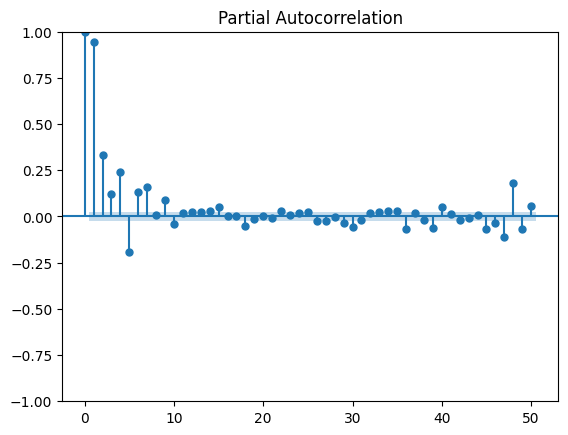

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales_data['Weekly_Sales'], lags=50)
plot_pacf(weekly_sales_data['Weekly_Sales'], lags=50)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
store_numbers = df['Store'].unique()
adf_test_statistic = []
p_values = []
lags_used = []
observations_used = []
stationary_status = []

for store_number in store_numbers:
    test_store = df[df['Store'] == store_number]
    result = adfuller(test_store['Weekly_Sales'])
    adf_test_statistic.append(result[0])
    p_values.append(result[1])
    lags_used.append(result[2])
    observations_used.append(result[3])

    if result[1] <= 0.05:
        stationary_status.append('Yes')
    else:
        stationary_status.append('No')

result = pd.DataFrame({'Store': store_numbers,'ADF Test Statistic': adf_test_statistic,
    'P-value': p_values,'#Lags Used': lags_used,'Number of Observations Used': observations_used,
    'Stationary': stationary_status})

In [ ]:
result

,Store,ADF Test Statistic,P-value,#Lags Used,Number of Observations Used,Stationary
0,1,-5.102186,1.387779e-05,4,138,Yes
1,2,-3.708863,3.990207e-03,6,136,Yes
2,3,-2.963868,3.840926e-02,6,136,Yes
3,4,-2.879382,4.779866e-02,6,136,Yes
4,5,-4.310974,4.251706e-04,4,138,Yes
5,6,-5.492502,2.159486e-06,4,138,Yes
6,7,-4.476254,2.170072e-04,7,135,Yes
7,8,-5.647653,1.002746e-06,4,138,Yes
8,9,-5.008564,2.134309e-05,4,138,Yes
9,10,-5.200703,8.763068e-06,4,138,Yes


In [ ]:
non_stationary_stores = result[result['Stationary'] == 'No']['Store'].tolist()
print(non_stationary_stores)

[14, 30, 36, 38, 42, 43, 44]


In [ ]:
non_stationary_df = df[df['Store'].isin(non_stationary_stores)].copy()
df = df[~df['Store'].isin(non_stationary_stores)].copy()

In [ ]:
non_stationary_df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
non_stationary_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,14,2623469.95,0,27.31,2.784,181.871190,8.992
2010-02-12,14,1704218.84,1,27.73,2.773,181.982317,8.992
2010-02-19,14,2204556.70,0,31.27,2.745,182.034782,8.992
2010-02-26,14,2095591.63,0,34.89,2.754,182.077469,8.992
2010-03-05,14,2237544.75,0,37.13,2.777,182.120157,8.992


In [ ]:
non_stationary_df = non_stationary_df.sort_values(by=['Store', 'Date'])
non_stationary_df['Diff_Weekly_Sales'] = non_stationary_df.groupby('Store')['Weekly_Sales'].diff()

In [ ]:
non_stationary_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Diff_Weekly_Sales
Date,,,,,,,,
2010-02-05,14,2623469.95,0,27.31,2.784,181.871190,8.992,NaN
2010-02-12,14,1704218.84,1,27.73,2.773,181.982317,8.992,-919251.11
2010-02-19,14,2204556.70,0,31.27,2.745,182.034782,8.992,500337.86
2010-02-26,14,2095591.63,0,34.89,2.754,182.077469,8.992,-108965.07
2010-03-05,14,2237544.75,0,37.13,2.777,182.120157,8.992,141953.12


In [ ]:
non_stationary_df.dropna(subset = ['Diff_Weekly_Sales'], inplace = True)

In [ ]:
store_numbers = non_stationary_df['Store'].unique()
adf_test_statistic = []
p_values = []
lags_used = []
observations_used = []
stationary_status = []

for store_number in store_numbers:
    test_store = non_stationary_df[non_stationary_df['Store'] == store_number]
    result = adfuller(test_store['Diff_Weekly_Sales'])

    adf_test_statistic.append(result[0])
    p_values.append(result[1])
    lags_used.append(result[2])
    observations_used.append(result[3])

    if result[1] <= 0.05:
        stationary_status.append('Yes')
    else:
        stationary_status.append('No')

# Creating the 'result' dataframe
result = pd.DataFrame({'Store': store_numbers, 'ADF Test Statistic': adf_test_statistic,
    'P-value': p_values,'#Lags Used': lags_used,'Number of Observations Used': observations_used,'Stationary': stationary_status})

In [ ]:
result

,Store,ADF Test Statistic,P-value,#Lags Used,Number of Observations Used,Stationary
0,14,-7.381184,8.464372e-11,5,136,Yes
1,30,-7.187476,2.554473e-10,5,136,Yes
2,36,-4.152939,7.907591e-04,9,132,Yes
3,38,-4.781426,5.901459e-05,11,130,Yes
4,42,-4.098051,9.757356e-04,11,130,Yes
5,43,-3.812654,2.780473e-03,12,129,Yes
6,44,-10.261667,4.220942e-18,3,138,Yes


In [ ]:
print(df.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


In [ ]:
print(weekly_sales_data.columns)

Index(['Store', 'Weekly_Sales'], dtype='object')


In [ ]:
# Check if any missing values exist
print(df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].isnull().sum())
print(weekly_sales_data['Weekly_Sales'].isnull().sum())

# Check the shape of both exog and dependent variable
print(df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].shape)
print(weekly_sales_data['Weekly_Sales'].shape)


Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
0
(5434, 5)
(6435,)


Feature Engineering

In [ ]:
def test_order(df, store_number):
    test_store = df[df['Store'] == store_number]
    time_series_data = test_store['Weekly_Sales'].values
    auto_model = auto_arima(time_series_data, start_p=1, start_q=1, max_p=3, max_q=3, m=52, start_P=0,
                            seasonal=True, d=None, D=0, trace=True, error_action='ignore',suppress_warnings=True,
                            stepwise=True)
    print(auto_model.summary())

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
def test_order1(df, store_number):
    test_store = df[df['Store'] == store_number]
    time_series_data = test_store['Diff_Weekly_Sales'].values
    auto_model = auto_arima(time_series_data, start_p=1, start_q=1,max_p=3, max_q=3, m=52,
                            start_P=0, seasonal=True, d=None, D=0, trace=True,
                            error_action='ignore', suppress_warnings=True,stepwise=True)
    print(auto_model.summary())

In [ ]:
non_stationary_df.reset_index(drop=True, inplace = True)

In [ ]:
test_order1(non_stationary_df, 44)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=3119.389, Time=4.62 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3253.446, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3156.362, Time=3.69 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=12.51 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3251.535, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=3144.854, Time=0.06 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=3121.081, Time=1.81 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=3116.683, Time=9.04 sec
 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=8.94 sec
 ARIMA(0,0,1)(0,0,2)[52] intercept   : AIC=3126.742, Time=7.83 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=3160.021, Time=5.09 sec
 ARIMA(2,0,1)(0,0,2)[52] intercept   : AIC=3116.394, Time=10.26 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=3118.927, Time=1.40 sec
 ARIMA(2,0,1)(1,0,2)[52] intercept   : AIC=3118.126, Time=14.22 sec
 ARIMA(2,0,1)(1,0,1)[52] i